# **Oficina: Análise Descritiva de Dados com Python**



# ***1. Importação e Entendimento dos Dados***



In [1]:
# importando as bibliotecas para lidar com os dados
import numpy as np
import pandas as pd

In [2]:
# importando os dados
houses = pd.read_csv("https://raw.githubusercontent.com/ProfLuciano/cd/gh-pages/data/recife.csv",encoding = "ISO-8859-1")

In [3]:
# apresentando o cabeçalho dos dados
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart


**Descrições dos cabeçalhos:**

*   price - preço
*   latitude - latitude (coordenada)
*   longitude - longitude (coordenada)
*   bedrooms - quartos
*   area - área quadrada
*   pkspaces - espaços ???
*   bathrooms - banheiros
*   ensuites - suites
*   suburb - bairro
*   district - distrito
*   city - cidade
*   state - estado
*   type - tipo do imóvel












In [8]:
# apresentando o tipo dos dados
houses.dtypes

price          int64
latitude     float64
longitude    float64
bedrooms     float64
area         float64
pkspaces     float64
bathrooms    float64
ensuites     float64
suburb        object
district      object
city          object
state         object
type          object
dtype: object

In [4]:
# Apresentando a estrutura da tabela dos dados
houses.shape

(1744, 13)

# **2. Adição de Novas Informações**

2.1. Adicionar informações sobre o tipo de negócio ao imóvel, exemplo: aluguel ou venda ...

In [9]:
# adicionando uma nova coluna 'operation'
# atribuindo todos os valores para 'sell' = 'venda'

houses['operation'] = 'sell'

In [12]:
# criando uma condição para definir se é venda ou alguel
# se o preco > 0 e preco < 30000, então é de aluguel = 'rent'
# .loc -> função que acessa um grupo de linhas e colunas ou um vetor booleano

houses.loc[ (houses['price'] > 0) & (houses['price'] < 30000),'operation' ] = 'rent'

In [14]:
# verificando a nova coluna

houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,operation
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart,rent
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart,sell
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart,sell
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart,sell
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart,sell


2.2. Adicionar o preço por métro quadrado

In [31]:
# houses['price_square_meter'] -> coluna nova
# calculo = preço / area

houses['price_square_meter'] = houses['price']/houses['area']

In [32]:
# verificando a nova coluna

houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,operation,price_square_meter
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart,rent,40.540541
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart,sell,3837.209302
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart,sell,3109.756098
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart,sell,4000.000000
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart,sell,3092.783505


# **3. Utilizando Estatísticas Univariadas**

3.1. Calcular a média de preço das casas a venda

In [16]:
# criando um filtro para definir as casas a venda

houses['operation'] == 'sell'

0       False
1        True
2        True
3        True
4        True
        ...  
1739     True
1740     True
1741    False
1742    False
1743     True
Name: operation, Length: 1744, dtype: bool

In [18]:
# capturando apenas os preços das casas a venda

houses[houses['operation'] == 'sell']['price']

1       330000
2       255000
3       380000
4       300000
5       320000
         ...  
1735    490000
1736    520000
1739    580000
1740    390000
1743    670000
Name: price, Length: 1242, dtype: int64

In [19]:
# calculando a média usando a função .mean()

houses[houses['operation'] == 'sell']['price'].mean()

652416.6103059581

3.2. Calcular a mediana de preço das casas a venda

In [20]:
# calculando a mediana usando a função .median()

houses[houses['operation'] == 'sell']['price'].median()

470000.0

3.3. Calcular a moda de preço das casas a venda

In [22]:
# calculando a moda usando a função .mode()

houses[houses['operation'] == 'sell']['price'].mode()

0    350000
Name: price, dtype: int64

3.4. Calcular a variância do preço das casas a venda

In [23]:
# calculando a variância usando a função .mode()

houses[houses['operation'] == 'sell']['price'].var()

371353283907.4838

3.5. Calcular o desvio padrão do preço das casas a venda

In [25]:
# calculando o desvio padrão usando a função .std()

houses[houses['operation'] == 'sell']['price'].std()

609387.6302547369

3.6. Calcular todas as estatísticas descritivas para a área quadrada das casas

In [24]:
# usando a função describe() para exibir todas as estatísticas descritivas

houses[houses['operation'] == 'sell']['area'].describe()

count    1220.000000
mean      128.066484
std       102.078742
min        25.000000
25%        72.000000
50%       100.000000
75%       149.000000
max      1682.000000
Name: area, dtype: float64

In [26]:
# coletando um valor especifico da função describe()

houses[houses['operation'] == 'sell']['area'].describe()[0]

1220.0

# **4. Apresentação de Gráficos Univariados**

4.1. Criar um boxplot da área das casas

<Axes: >

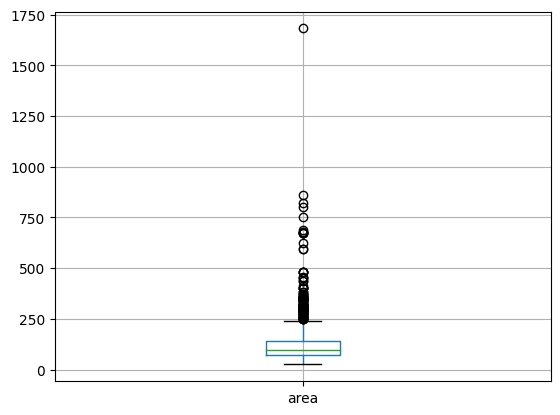

In [28]:
houses.boxplot(column=['area'])

4.2. Plotar o posicionamento das casas

<Axes: xlabel='longitude', ylabel='latitude'>

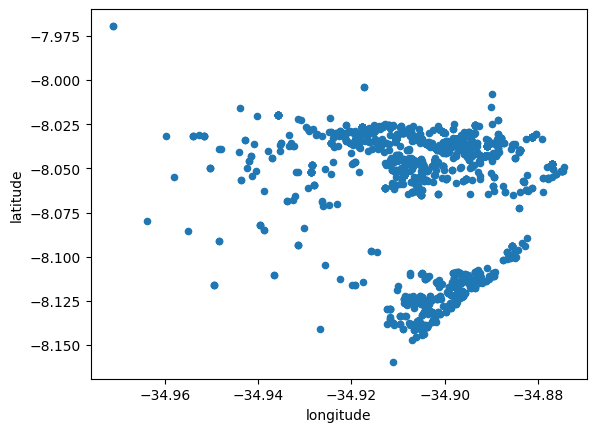

In [44]:
# a função scatter() cria um gráfico de dispersão utilizando as coordenadas de x e y

houses.plot.scatter(x='longitude',y='latitude')

4.3. Criar um gráfico que ordena os bairros com maiores preços por metro quadrado

In [35]:
# 1. definindo o filtro de casas a venda
houses['operation'] == 'sell'

0       False
1        True
2        True
3        True
4        True
        ...  
1739     True
1740     True
1741    False
1742    False
1743     True
Name: operation, Length: 1744, dtype: bool

In [38]:
# 2. Agrupando os preços das casas por bairros
# a função groupby() agrupa dados de acordo com as informações da coluna especificada
houses[houses['operation'] == 'sell'].groupby(['suburb'])

In [39]:
# 3. Calculando o valor médio por metro quadrado de acordo com o bairro
houses[houses['operation']=='sell'].groupby(['suburb'])['price_square_meter'].mean()

suburb
Aflitos             5057.981293
Apipucos            4953.378876
Areias              2317.073171
Arruda              3599.960047
Boa Viagem          5930.295787
Boa Vista           4665.206061
Campo Grande        4648.761296
Casa Amarela        5351.374665
Casa Forte          6183.445243
CaxangÌÁ            4587.357285
Coelhos             4666.666667
Cohab               1933.333333
Cordeiro            4083.564554
Derby               9043.387168
Encruzilhada        5052.220649
Engenho do Meio     9641.890805
Espinheiro          5231.928476
FundÌ£o             3920.280333
GraÌ¤as             4587.853776
HipÌ_dromo          2502.343750
Ibura               5990.463333
Ilha do Retiro      6055.816062
Imbiribeira         9902.509394
Ipsep               2777.982481
Iputinga            1770.728716
Jaqueira            6742.418062
Madalena            5794.175868
Mangabeira          4138.295095
Monteiro            6544.807869
Parnamirim          5511.663726
Pau-Ferro           2395.826190
P

In [40]:
# 4. Ordenando as médias
houses[houses['operation']=='sell'].groupby(['suburb'])['price_square_meter'].mean().sort_values(ascending=False)

suburb
Imbiribeira         9902.509394
Engenho do Meio     9641.890805
Soledade            9607.917369
Derby               9043.387168
Pina                7330.712373
Santana             6863.182567
Jaqueira            6742.418062
PoÌ¤o               6577.684081
Monteiro            6544.807869
Rosarinho           6279.017922
Casa Forte          6183.445243
Ilha do Retiro      6055.816062
Ibura               5990.463333
Boa Viagem          5930.295787
Madalena            5794.175868
Torre               5729.832650
Tamarineira         5584.412500
Parnamirim          5511.663726
Casa Amarela        5351.374665
Espinheiro          5231.928476
Ponto de Parada     5217.510616
Prado               5181.694309
Santo Amaro         5127.974333
Aflitos             5057.981293
Encruzilhada        5052.220649
Apipucos            4953.378876
TorreÌ£o            4826.267203
Coelhos             4666.666667
Boa Vista           4665.206061
Campo Grande        4648.761296
GraÌ¤as             4587.853776
C

<Axes: xlabel='suburb'>

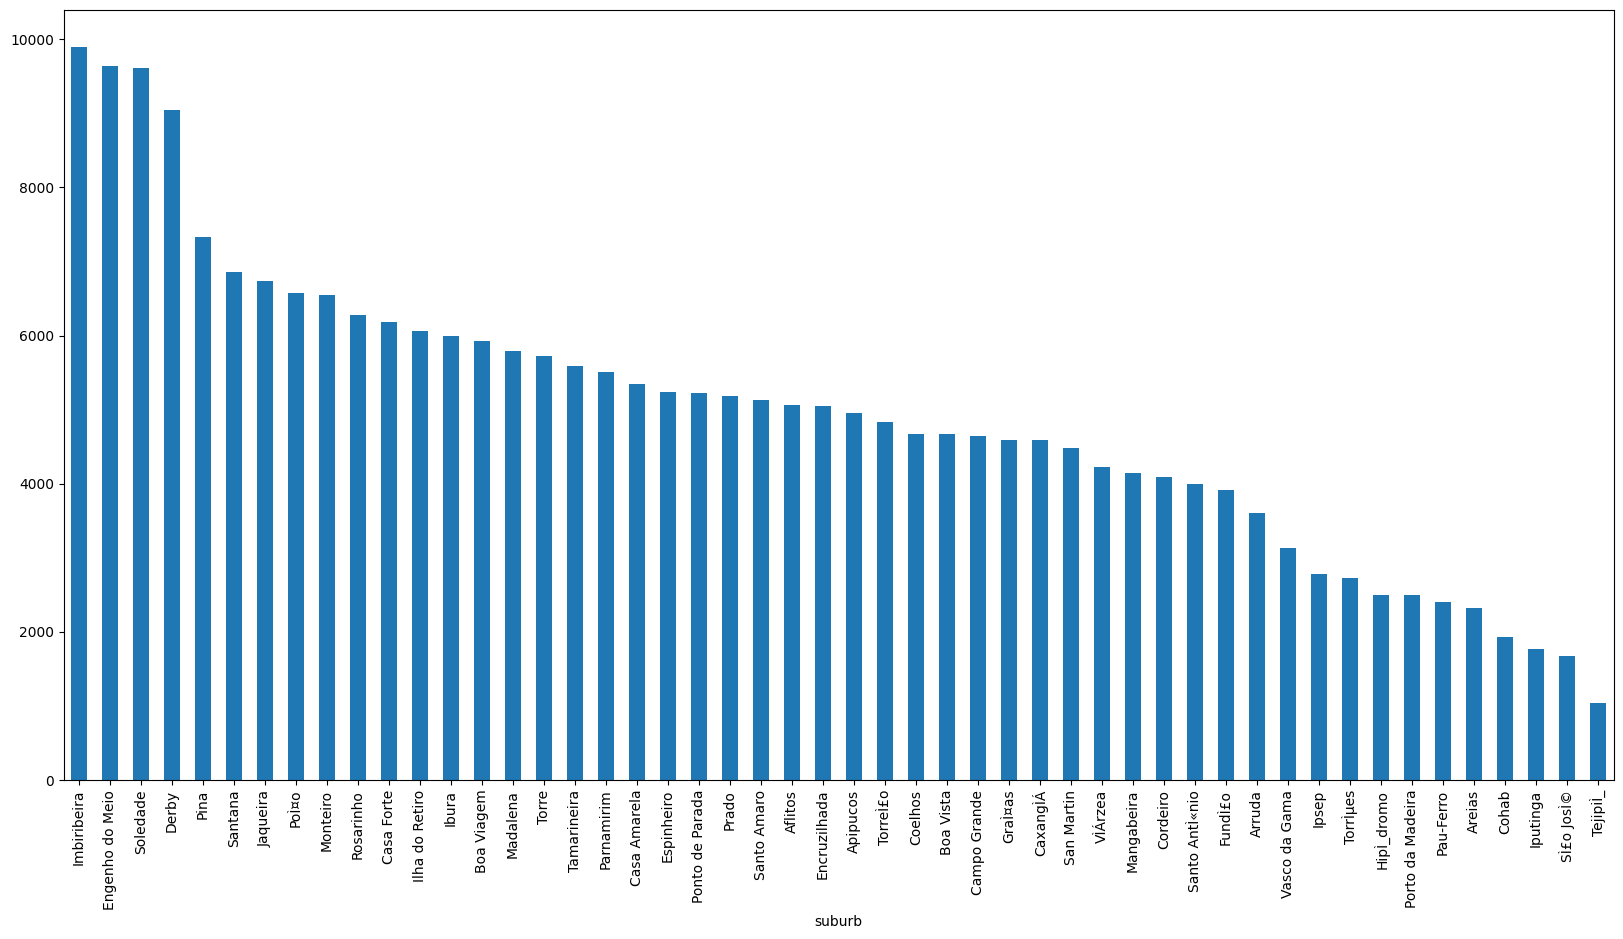

In [41]:
# plotando o gráfico com as médias por bairro ordenadas
houses[houses['operation']=='sell'].groupby(['suburb'])['price_square_meter'].mean().sort_values(ascending=False).plot.bar(figsize=(20,10))

# **5. Estatísticas Bivariadas**

5.1. Calcular a covariância

In [42]:
# função .cov() para calcular a covariância

houses[houses.operation=='sell'].cov()

<ipython-input-42-a39018129fce>:3: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  houses[houses.operation=='sell'].cov()


,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,price_square_meter
price,3.713533e+11,-2171.657900,-425.307071,301614.579684,4.207143e+07,332370.180148,411998.187635,325102.123490,1.089569e+09
latitude,-2.171658e+03,0.000992,-0.000045,-0.003230,-1.293944e-01,-0.001840,0.003016,-0.000310,-8.937359e+00
longitude,-4.253071e+02,-0.000045,0.000233,-0.001055,-1.443103e-01,-0.002335,-0.001252,-0.002352,8.909269e-01
bedrooms,3.016146e+05,-0.003230,-0.001055,1.092577,5.815163e+01,0.679856,0.757604,0.419521,7.175439e+01
area,4.207143e+07,-0.129394,-0.144310,58.151630,1.042007e+04,59.909799,74.235459,58.567118,-4.020638e+04
pkspaces,3.323702e+05,-0.001840,-0.002335,0.679856,5.990980e+01,1.027633,0.740625,0.573380,3.073067e+02
bathrooms,4.119982e+05,0.003016,-0.001252,0.757604,7.423546e+01,0.740625,1.470918,0.878985,2.435710e+02
ensuites,3.251021e+05,-0.000310,-0.002352,0.419521,5.856712e+01,0.573380,0.878985,0.859048,2.376223e+02
price_square_meter,1.089569e+09,-8.937359,0.890927,71.754388,-4.020638e+04,307.306746,243.571006,237.622300,1.297808e+07


5.2. Calcular a correlação de pearson para as casas a venda

In [45]:
# o método .corr() calcula a correlação dos dados
# 'pearson' foi o método adotado para realizar o calculo

houses[houses.operation=='sell'].corr(method='pearson')

<ipython-input-45-1f61130edcb0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  houses[houses.operation=='sell'].corr(method='pearson')


,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,price_square_meter
price,1.000000,-0.113166,-0.045734,0.473514,0.677350,0.575893,0.542489,0.679669,0.497062
latitude,-0.113166,1.000000,-0.094013,-0.098142,-0.040105,-0.060521,0.079602,-0.015053,-0.078492
longitude,-0.045734,-0.094013,1.000000,-0.066159,-0.092344,-0.153498,-0.066682,-0.165846,0.016154
bedrooms,0.473514,-0.098142,-0.066159,1.000000,0.561188,0.656571,0.664399,0.562102,0.019621
area,0.677350,-0.040105,-0.092344,0.561188,1.000000,0.574699,0.605221,0.669119,-0.109334
pkspaces,0.575893,-0.060521,-0.153498,0.656571,0.574699,1.000000,0.631790,0.649819,0.128638
bathrooms,0.542489,0.079602,-0.066682,0.664399,0.605221,0.631790,1.000000,0.850007,0.052967
ensuites,0.679669,-0.015053,-0.165846,0.562102,0.669119,0.649819,0.850007,1.000000,0.095140
price_square_meter,0.497062,-0.078492,0.016154,0.019621,-0.109334,0.128638,0.052967,0.095140,1.000000


5.3. Calcular a correlação de pearson para as casas a venda

In [47]:
# o método .corr() calcula a correlação dos dados
# 'spearman' foi o método adotado para realizar o calculo

houses[houses.operation=='sell'].corr(method='spearman')

<ipython-input-47-474f9cc0c5e6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  houses[houses.operation=='sell'].corr(method='spearman')


,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,price_square_meter
price,1.000000,-0.066591,-0.069280,0.639660,0.723069,0.713786,0.656935,0.718041,0.443111
latitude,-0.066591,1.000000,-0.205969,-0.134175,-0.070345,-0.085252,0.030275,0.070180,0.022080
longitude,-0.069280,-0.205969,1.000000,-0.049529,-0.093217,-0.138025,-0.049273,-0.177310,-0.062570
bedrooms,0.639660,-0.134175,-0.049529,1.000000,0.736587,0.694278,0.701999,0.634320,-0.064802
area,0.723069,-0.070345,-0.093217,0.736587,1.000000,0.701702,0.678649,0.658985,-0.188167
pkspaces,0.713786,-0.085252,-0.138025,0.694278,0.701702,1.000000,0.590699,0.626918,0.140522
bathrooms,0.656935,0.030275,-0.049273,0.701999,0.678649,0.590699,1.000000,0.803017,0.074260
ensuites,0.718041,0.070180,-0.177310,0.634320,0.658985,0.626918,0.803017,1.000000,0.203648
price_square_meter,0.443111,0.022080,-0.062570,-0.064802,-0.188167,0.140522,0.074260,0.203648,1.000000
